# VR Controller Data Analysis

## Introduction

Which VR controller is better?

Task: Selection in 3D (easy, medium, hard)

- IV1: Controller (2 levels: H, C)
- IV2: Task difficulty (3 levels: E, M, H)
- 6 Conditions:  HE,HM,HH,CE,CM,CH
- Within-subject 
- DV1: Time to select target
- DV2: Wrongly selected target
- DV3: Perceived task load (preference)

## Load Data and Package

In [8]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import shapiro

In [9]:
# Load the dataset
df = pd.read_csv("dataset.csv")

# Display the first few rows of the data
df.head()

,Participant,Condition,Controller,Task_Difficulty,Time_to_Select,Wrongly_Selected_Target,Perceived_Task_Load
0,1,HE,Hand,Easy,5.548357,0,5
1,1,CE,Controller,Easy,4.730868,0,2
2,1,HM,Hand,Medium,6.639521,1,3
3,1,CM,Controller,Medium,6.005258,0,5
4,1,HH,Hand,Hard,7.209561,1,1


## Alternative of Hypothesis 1

- H1: The speed of task completion depends on both the controller type (A or B) and the task difficulty (Easy, Medium, Hard).
- H1_0: The speed of task completion does not depend on either the controller type or the task difficulty.

### Step 1. Check Properties of Your Data

#### 1.1 Descriptive Statistics

In [10]:
df.groupby(['Controller', 'Task_Difficulty'])['Time_to_Select'].describe()

count      mean       std       min       25%  \
Controller Task_Difficulty                                                  
Controller Easy              30.0  4.958084  0.430834  4.054013  4.747481   
           Hard              30.0  6.100631  0.574214  5.290019  5.666940   
           Medium            30.0  5.678547  0.456007  4.844338  5.409307   
Hand       Easy              30.0  5.191489  0.566522  3.860272  5.001234   
           Hard              30.0  7.397409  0.478232  6.481462  7.094336   
           Medium            30.0  6.521517  0.432965  5.760739  6.215787   

                                 50%       75%       max  
Controller Task_Difficulty                                
Controller Easy             4.938442  5.215430  5.973998  
           Hard             6.057475  6.495412  7.626993  
           Medium           5.662223  5.934727  6.860085  
Hand       Easy             5.298533  5.580385  6.131885  
           Hard             7.364926  7.752051  8.271534  
           Medium           6.513338  6.813805  7.466920

### 1.2 Visualize Distributions

#### 1.2.1 Boxplot for Task Difficulty and Controller
Visualize the distribution of `Time_to_Select` across combinations of `Controller` and `Task_Difficulty`

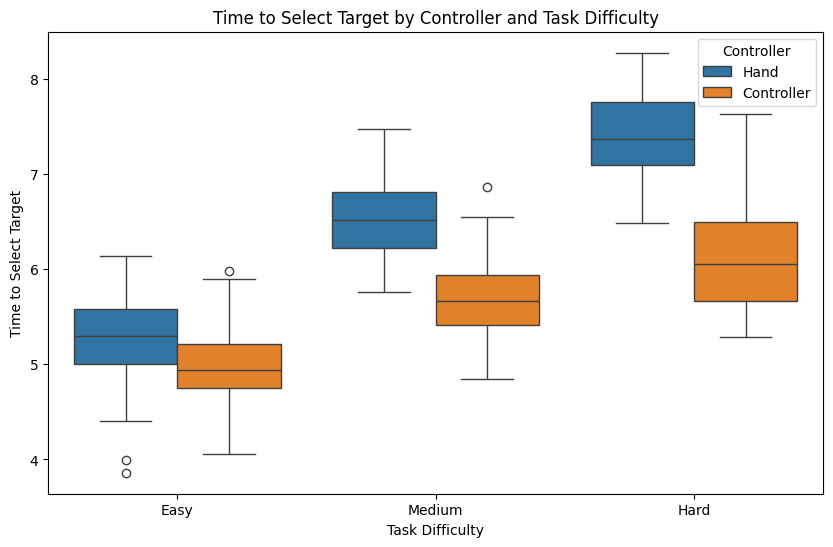

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Task_Difficulty', y='Time_to_Select', hue='Controller', data=df)
plt.title("Time to Select Target by Controller and Task Difficulty")
plt.xlabel("Task Difficulty")
plt.ylabel("Time to Select Target")
plt.legend(title="Controller")
plt.show()

#### 1.2.2 Interaction Plot
Plot the mean `Time_to_Select` for each `Task_Difficulty` level, with separate lines for each `Controller`.

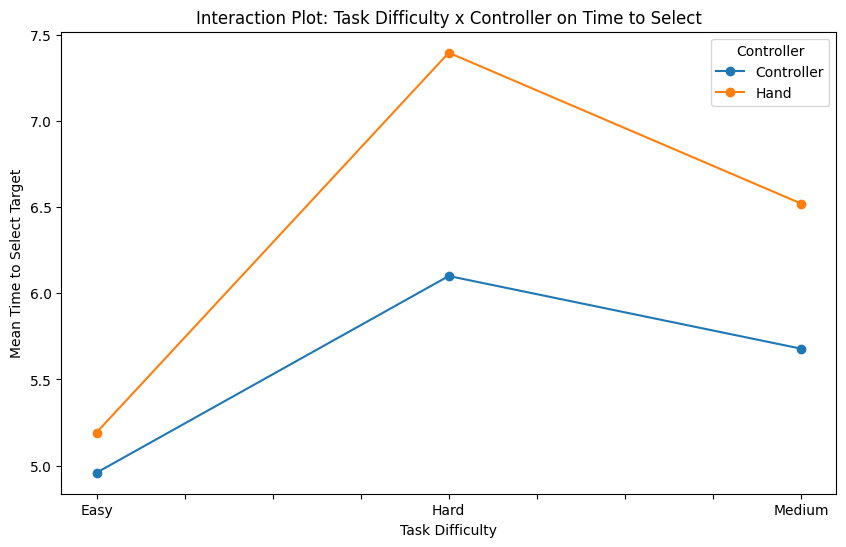

In [12]:
# Calculate means for interaction plot
interaction_means = df.groupby(['Task_Difficulty', 'Controller'])['Time_to_Select'].mean().unstack()

# Plot interaction
interaction_means.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Interaction Plot: Task Difficulty x Controller on Time to Select")
plt.xlabel("Task Difficulty")
plt.ylabel("Mean Time to Select Target")
plt.legend(title="Controller")
plt.show()

**What is an interaction plot?**

- The x-axis represents one IV (e.g., `Task_Difficulty` with levels Easy, Medium, Hard).
- Separate lines represent the levels of the second IV (e.g., `Controller` with levels Hand and Controller).
- The y-axis represents the mean value of the DV (`Time_to_Select`) for each combination of the two IVs.

**How to read an interaction plot?**

- **Parallel lines**: suggest no interaction between the two IVs
- **No-Parallel lines**: suggest an interaction between the two IVs
- **Steeper slopes**: suggest a stronger effect of the IV on the DV
- **Flat slopes**: suggest a minimal effect across levels
- **Lines cross**: strong evidence of an interaction



#### 1.2.3 Histogram
Show the distribution of `Time_to_Select` across all conditions.


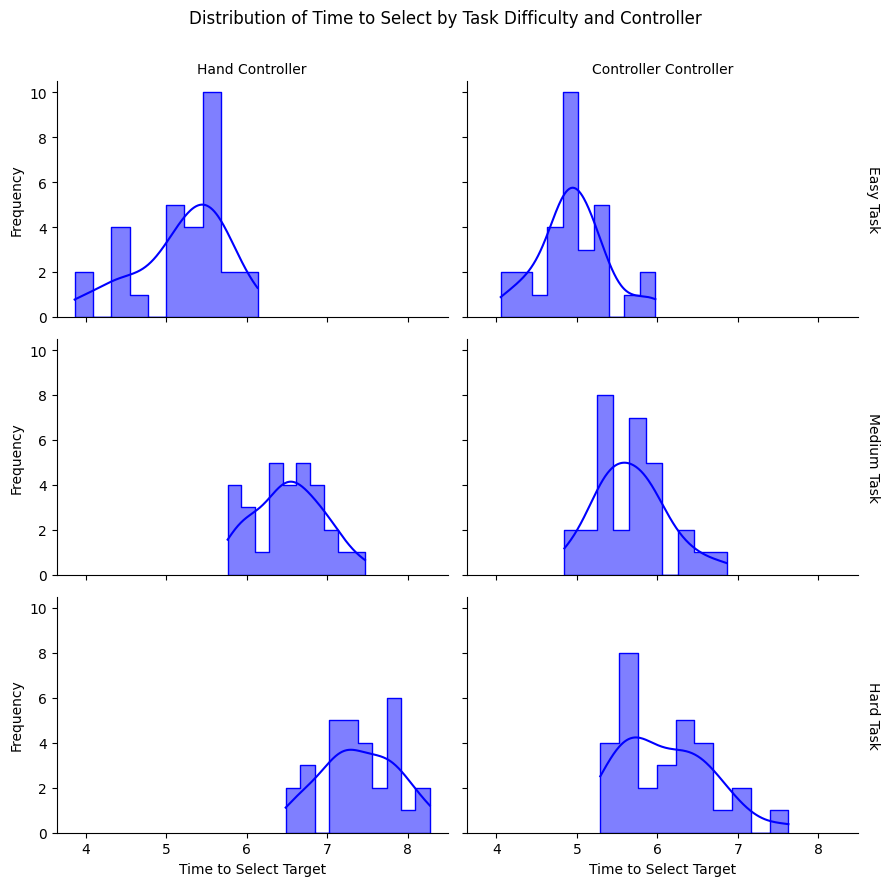

In [13]:
# FacetGrid to show histograms by Task Difficulty and Controller
g = sns.FacetGrid(df, row='Task_Difficulty', col='Controller', margin_titles=True, height=3, aspect=1.5)
g.map(sns.histplot, 'Time_to_Select', kde=True, bins=10, color='blue', element="step")

# Add titles and labels
g.set_axis_labels("Time to Select Target", "Frequency")
g.set_titles(row_template="{row_name} Task", col_template="{col_name} Controller")
plt.subplots_adjust(top=0.9)
g.figure.suptitle("Distribution of Time to Select by Task Difficulty and Controller")
plt.show()

#### 1.4 Test Normality
For each group, perform the Shapiro-Wilk test:


In [14]:
# Group the data by Task Difficulty and Controller
groups = df.groupby(['Task_Difficulty', 'Controller'])

# Perform Shapiro-Wilk test for each group
for (task, controller), group in groups:
    stat, p_value = shapiro(group['Time_to_Select'])
    print(f"{task} Task - {controller} Controller: W={stat:.3f}, p={p_value:.3f}")
    if p_value < 0.05:
        print("  Likely not normally distributed.\n")
    else:
        print("  Likely normally distributed.\n")

Easy Task - Controller Controller: W=0.961, p=0.328
  Likely normally distributed.

Easy Task - Hand Controller: W=0.935, p=0.067
  Likely normally distributed.

Hard Task - Controller Controller: W=0.951, p=0.175
  Likely normally distributed.

Hard Task - Hand Controller: W=0.976, p=0.715
  Likely normally distributed.

Medium Task - Controller Controller: W=0.976, p=0.705
  Likely normally distributed.

Medium Task - Hand Controller: W=0.981, p=0.840
  Likely normally distributed.



### Step 2. Select Statistical Test

We will conduct a two-way ANOVA as our data meets the following assumptions:

- Independence: Observations are independent within each group.
- Continuous Dependent Variable: The dependent variable (`Time_to_Select`) is continuous.
- Normality: The dependent variable is approximately normally distributed within each group formed by the combination of the independent variables (`Controller` and `Task_Difficulty`).
- Homogeneity of Variances: The variance of the dependent variable is similar across groups.

A two-way ANOVA is appropriate for our study because it allows us to analyze the main effects of two independent variables (`Controller` and `Task_Difficulty`) and their interaction effect on the dependent variable (`Time_to_Select`).

### Step 3. Perform Hypothesis Testing

#### 3.1 Two-Way ANOVA Test

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset (replace with your actual dataset)
# Example: df = pd.read_csv("your_data.csv")

# Fit the two-way ANOVA model
model = ols('Time_to_Select ~ C(Controller) + C(Task_Difficulty) + C(Controller):C(Task_Difficulty)', data=df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print("Two-Way ANOVA Results:")
print(anova_table)

Two-Way ANOVA Results:
                                     sum_sq     df           F        PR(>F)
C(Controller)                     28.159261    1.0  115.691809  5.200631e-21
C(Task_Difficulty)                85.507431    2.0  175.652857  1.786198e-42
C(Controller):C(Task_Difficulty)   8.541379    2.0   17.546050  1.143961e-07
Residual                          42.351412  174.0         NaN           NaN


**Result Interpretation**

1. Main Effect of `Controller`
- p-value (PR>F): 5.20e-21, p<0.05, indicating a statistically significant main effect of `Controller` on `Time_to_Select`
- The type of controller significantly affects task completion time, irrespective of task difficulty.

2. Main Effect of `Task_Difficulty`
- p-value (PR>F): 1.79e-42, p<0.05, indicating a statistically significant main effect of `Task_Difficulty` on `Time_to_Select`
- Task difficulty significantly affects task completion time, irrespective of controller type.

3. Interaction Effect of `Controller x Task_Difficulty`
- p-value (PR>F): 1.14e-07, p<0.05, indicating a statistically significant interaction effect.
- The effect of `Controller` on task completion time depends on the level of `Task_Difficulty`

#### 3.2 Post-Hoc Tests

Perform pairwise comparisons with Tukey HSD test to determine which specific groups (e.g., `Hand-Easy` vs. `Controller-Easy`) differ significantly:

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined condition column for post-hoc analysis
df['Condition'] = df['Controller'] + "_" + df['Task_Difficulty']

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Time_to_Select'], groups=df['Condition'], alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
  Controller_Easy   Controller_Hard   1.1425    0.0  0.7755  1.5096   True
  Controller_Easy Controller_Medium   0.7205    0.0  0.3534  1.0876   True
  Controller_Easy         Hand_Easy   0.2334 0.4478 -0.1337  0.6005  False
  Controller_Easy         Hand_Hard   2.4393    0.0  2.0722  2.8064   True
  Controller_Easy       Hand_Medium   1.5634    0.0  1.1963  1.9305   True
  Controller_Hard Controller_Medium  -0.4221 0.0141 -0.7892  -0.055   True
  Controller_Hard         Hand_Easy  -0.9091    0.0 -1.2762 -0.5421   True
  Controller_Hard         Hand_Hard   1.2968    0.0  0.9297  1.6639   True
  Controller_Hard       Hand_Medium   0.4209 0.0145  0.0538   0.788   True
Controller_Medium         Hand_Easy  -0.4871 0.0025 -0.8541   -0.12   True
Controller_Medium        

**Result Interpretation**

The Tukey HSD test compares all possible pairs of groups (based on the combinations of Controller and Task_Difficulty) to determine where significant differences lie. Below is how to interpret the results:

- `meandiff`: The difference in mean Time_to_Select between two groups.
- `p-adj`: Adjusted p-value after correcting for multiple comparisons (e.g., controlling for family-wise error rate).
- `lower / upper`: The confidence interval for the mean difference.
- `reject`: Indicates whether the null hypothesis (no difference between the two groups) is rejected (True) or not (False).


**Conclusion**
- Easy tasks show minimal differences between controllers.
- Hard tasks with the Hand controller take significantly longer than those with the Controller.